# Covid

## Heatmap

In [ ]:
covid = pd.read_csv('owid-covid-data.csv')

In [ ]:
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220338,ZWE,Africa,Zimbabwe,9/26/2022,257342.0,2.0,36.000,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220339,ZWE,Africa,Zimbabwe,9/27/2022,257376.0,34.0,31.429,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220340,ZWE,Africa,Zimbabwe,9/28/2022,257409.0,33.0,36.143,5602.0,3.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220341,ZWE,Africa,Zimbabwe,9/29/2022,257409.0,0.0,21.429,5602.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220343 entries, 0 to 220342
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    220343 non-null  object 
 1   continent                                   207670 non-null  object 
 2   location                                    220343 non-null  object 
 3   date                                        220343 non-null  object 
 4   total_cases                                 211377 non-null  float64
 5   new_cases                                   211112 non-null  float64
 6   new_cases_smoothed                          209916 non-null  float64
 7   total_deaths                                192273 non-null  float64
 8   new_deaths                                  192215 non-null  float64
 9   new_deaths_smoothed                         191035 non-null  float64
 

In [ ]:
covid["date"] = pd.to_datetime(covid["date"])

### Table of new cases

In [ ]:
data  = pd.pivot_table(covid, values='new_cases', index=['date'],
                    columns=['location'], aggfunc=np.sum)

In [ ]:
data = data[60:151]

In [ ]:
data_new = data[['Australia', 'Afghanistan', 'India', 'Indonesia', 'China', 'Japan','Iran', 'Thailand', 'Israel', 
                 'Algeria', 'Angola', 'Ethiopia', 'Egypt', 'Kenya', 'South Africa', 'Zambia', 'Zimbabwe',
                'Argentina', 'Brazil', 'Ecuador', 'Chile', 'Uruguay', 'Canada', 'United States', 'Mexico',
                'United Kingdom',  'Austria', 'Belgium', 'Croatia', 'Denmark', 'France', 'Germany', 'Italy', 'Norway', 
                'Sweden', 'Russia', 'Spain']]

In [ ]:
data_new = data_new.fillna(0)

In [ ]:
data_new

location,Australia,Afghanistan,India,Indonesia,China,Japan,Iran,Thailand,Israel,Algeria,...,Belgium,Croatia,Denmark,France,Germany,Italy,Norway,Sweden,Russia,Spain
date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,2.0,0.0,0.0,0.0,575.0,14.0,385.0,0.0,1.0,0.0,...,1.0,1.0,1.0,30.0,51.0,566.0,4.0,0.0,0.0,39.0
2020-03-02,3.0,0.0,2.0,2.0,200.0,19.0,523.0,1.0,5.0,2.0,...,6.0,0.0,0.0,61.0,33.0,342.0,6.0,5.0,1.0,36.0
2020-03-03,9.0,0.0,0.0,0.0,125.0,20.0,835.0,0.0,3.0,2.0,...,5.0,2.0,2.0,21.0,38.0,466.0,7.0,13.0,0.0,45.0
2020-03-04,13.0,0.0,23.0,0.0,120.0,35.0,586.0,0.0,0.0,7.0,...,10.0,1.0,4.0,76.0,52.0,587.0,24.0,30.0,0.0,57.0
2020-03-05,3.0,0.0,2.0,0.0,151.0,32.0,591.0,4.0,6.0,0.0,...,27.0,0.0,0.0,138.0,109.0,769.0,31.0,25.0,1.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-26,13.0,737.0,5843.0,415.0,30.0,30.0,1787.0,3.0,50.0,194.0,...,113.0,0.0,41.0,255.0,432.0,397.0,19.0,746.0,8915.0,859.0
2020-05-27,11.0,548.0,7293.0,686.0,30.0,26.0,2080.0,9.0,40.0,160.0,...,137.0,0.0,52.0,173.0,362.0,584.0,18.0,800.0,8338.0,0.0
2020-05-28,15.0,637.0,7300.0,687.0,23.0,60.0,2258.0,11.0,77.0,140.0,...,257.0,1.0,32.0,3342.0,353.0,593.0,10.0,774.0,8371.0,1647.0


In [ ]:
data_new2 = data_new.T

In [ ]:
data_new2 

date,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30
location,,,,,,,,,,,,,,,,,,,,,
Australia,2.0,3.0,9.0,13.0,3.0,5.0,3.0,13.0,15.0,16.0,...,14.0,4.0,15.0,0.0,12.0,13.0,11.0,15.0,19.0,8.0
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,531.0,540.0,736.0,716.0,512.0,737.0,548.0,637.0,643.0,784.0
India,0.0,2.0,0.0,23.0,2.0,1.0,3.0,5.0,4.0,13.0,...,6198.0,6568.0,6629.0,7113.0,6414.0,5843.0,7293.0,7300.0,8105.0,8336.0
Indonesia,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,13.0,8.0,...,973.0,634.0,949.0,526.0,479.0,415.0,686.0,687.0,678.0,557.0
China,575.0,200.0,125.0,120.0,151.0,151.0,79.0,47.0,36.0,22.0,...,31.0,43.0,31.0,47.0,47.0,30.0,30.0,23.0,9.0,6.0
Japan,14.0,19.0,20.0,35.0,32.0,55.0,46.0,33.0,28.0,58.0,...,41.0,23.0,25.0,41.0,21.0,30.0,26.0,60.0,73.0,45.0
Iran,385.0,523.0,835.0,586.0,591.0,1234.0,1076.0,743.0,595.0,881.0,...,2392.0,2311.0,1869.0,2180.0,2023.0,1787.0,2080.0,2258.0,2819.0,2282.0
Thailand,0.0,1.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,3.0,...,3.0,0.0,3.0,0.0,2.0,3.0,9.0,11.0,11.0,1.0
Israel,1.0,5.0,3.0,0.0,6.0,16.0,10.0,9.0,4.0,28.0,...,17.0,19.0,5.0,13.0,22.0,50.0,40.0,77.0,113.0,29.0


In [ ]:
data_new2 = data_new2.rename(columns = lambda x: str(x))
data_new2.columns = data_new2.columns.str.replace(' 00:00:00', '')

In [ ]:
data_new2

date,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30
location,,,,,,,,,,,,,,,,,,,,,
Australia,2.0,3.0,9.0,13.0,3.0,5.0,3.0,13.0,15.0,16.0,...,14.0,4.0,15.0,0.0,12.0,13.0,11.0,15.0,19.0,8.0
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,531.0,540.0,736.0,716.0,512.0,737.0,548.0,637.0,643.0,784.0
India,0.0,2.0,0.0,23.0,2.0,1.0,3.0,5.0,4.0,13.0,...,6198.0,6568.0,6629.0,7113.0,6414.0,5843.0,7293.0,7300.0,8105.0,8336.0
Indonesia,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,13.0,8.0,...,973.0,634.0,949.0,526.0,479.0,415.0,686.0,687.0,678.0,557.0
China,575.0,200.0,125.0,120.0,151.0,151.0,79.0,47.0,36.0,22.0,...,31.0,43.0,31.0,47.0,47.0,30.0,30.0,23.0,9.0,6.0
Japan,14.0,19.0,20.0,35.0,32.0,55.0,46.0,33.0,28.0,58.0,...,41.0,23.0,25.0,41.0,21.0,30.0,26.0,60.0,73.0,45.0
Iran,385.0,523.0,835.0,586.0,591.0,1234.0,1076.0,743.0,595.0,881.0,...,2392.0,2311.0,1869.0,2180.0,2023.0,1787.0,2080.0,2258.0,2819.0,2282.0
Thailand,0.0,1.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,3.0,...,3.0,0.0,3.0,0.0,2.0,3.0,9.0,11.0,11.0,1.0
Israel,1.0,5.0,3.0,0.0,6.0,16.0,10.0,9.0,4.0,28.0,...,17.0,19.0,5.0,13.0,22.0,50.0,40.0,77.0,113.0,29.0


### Graphs

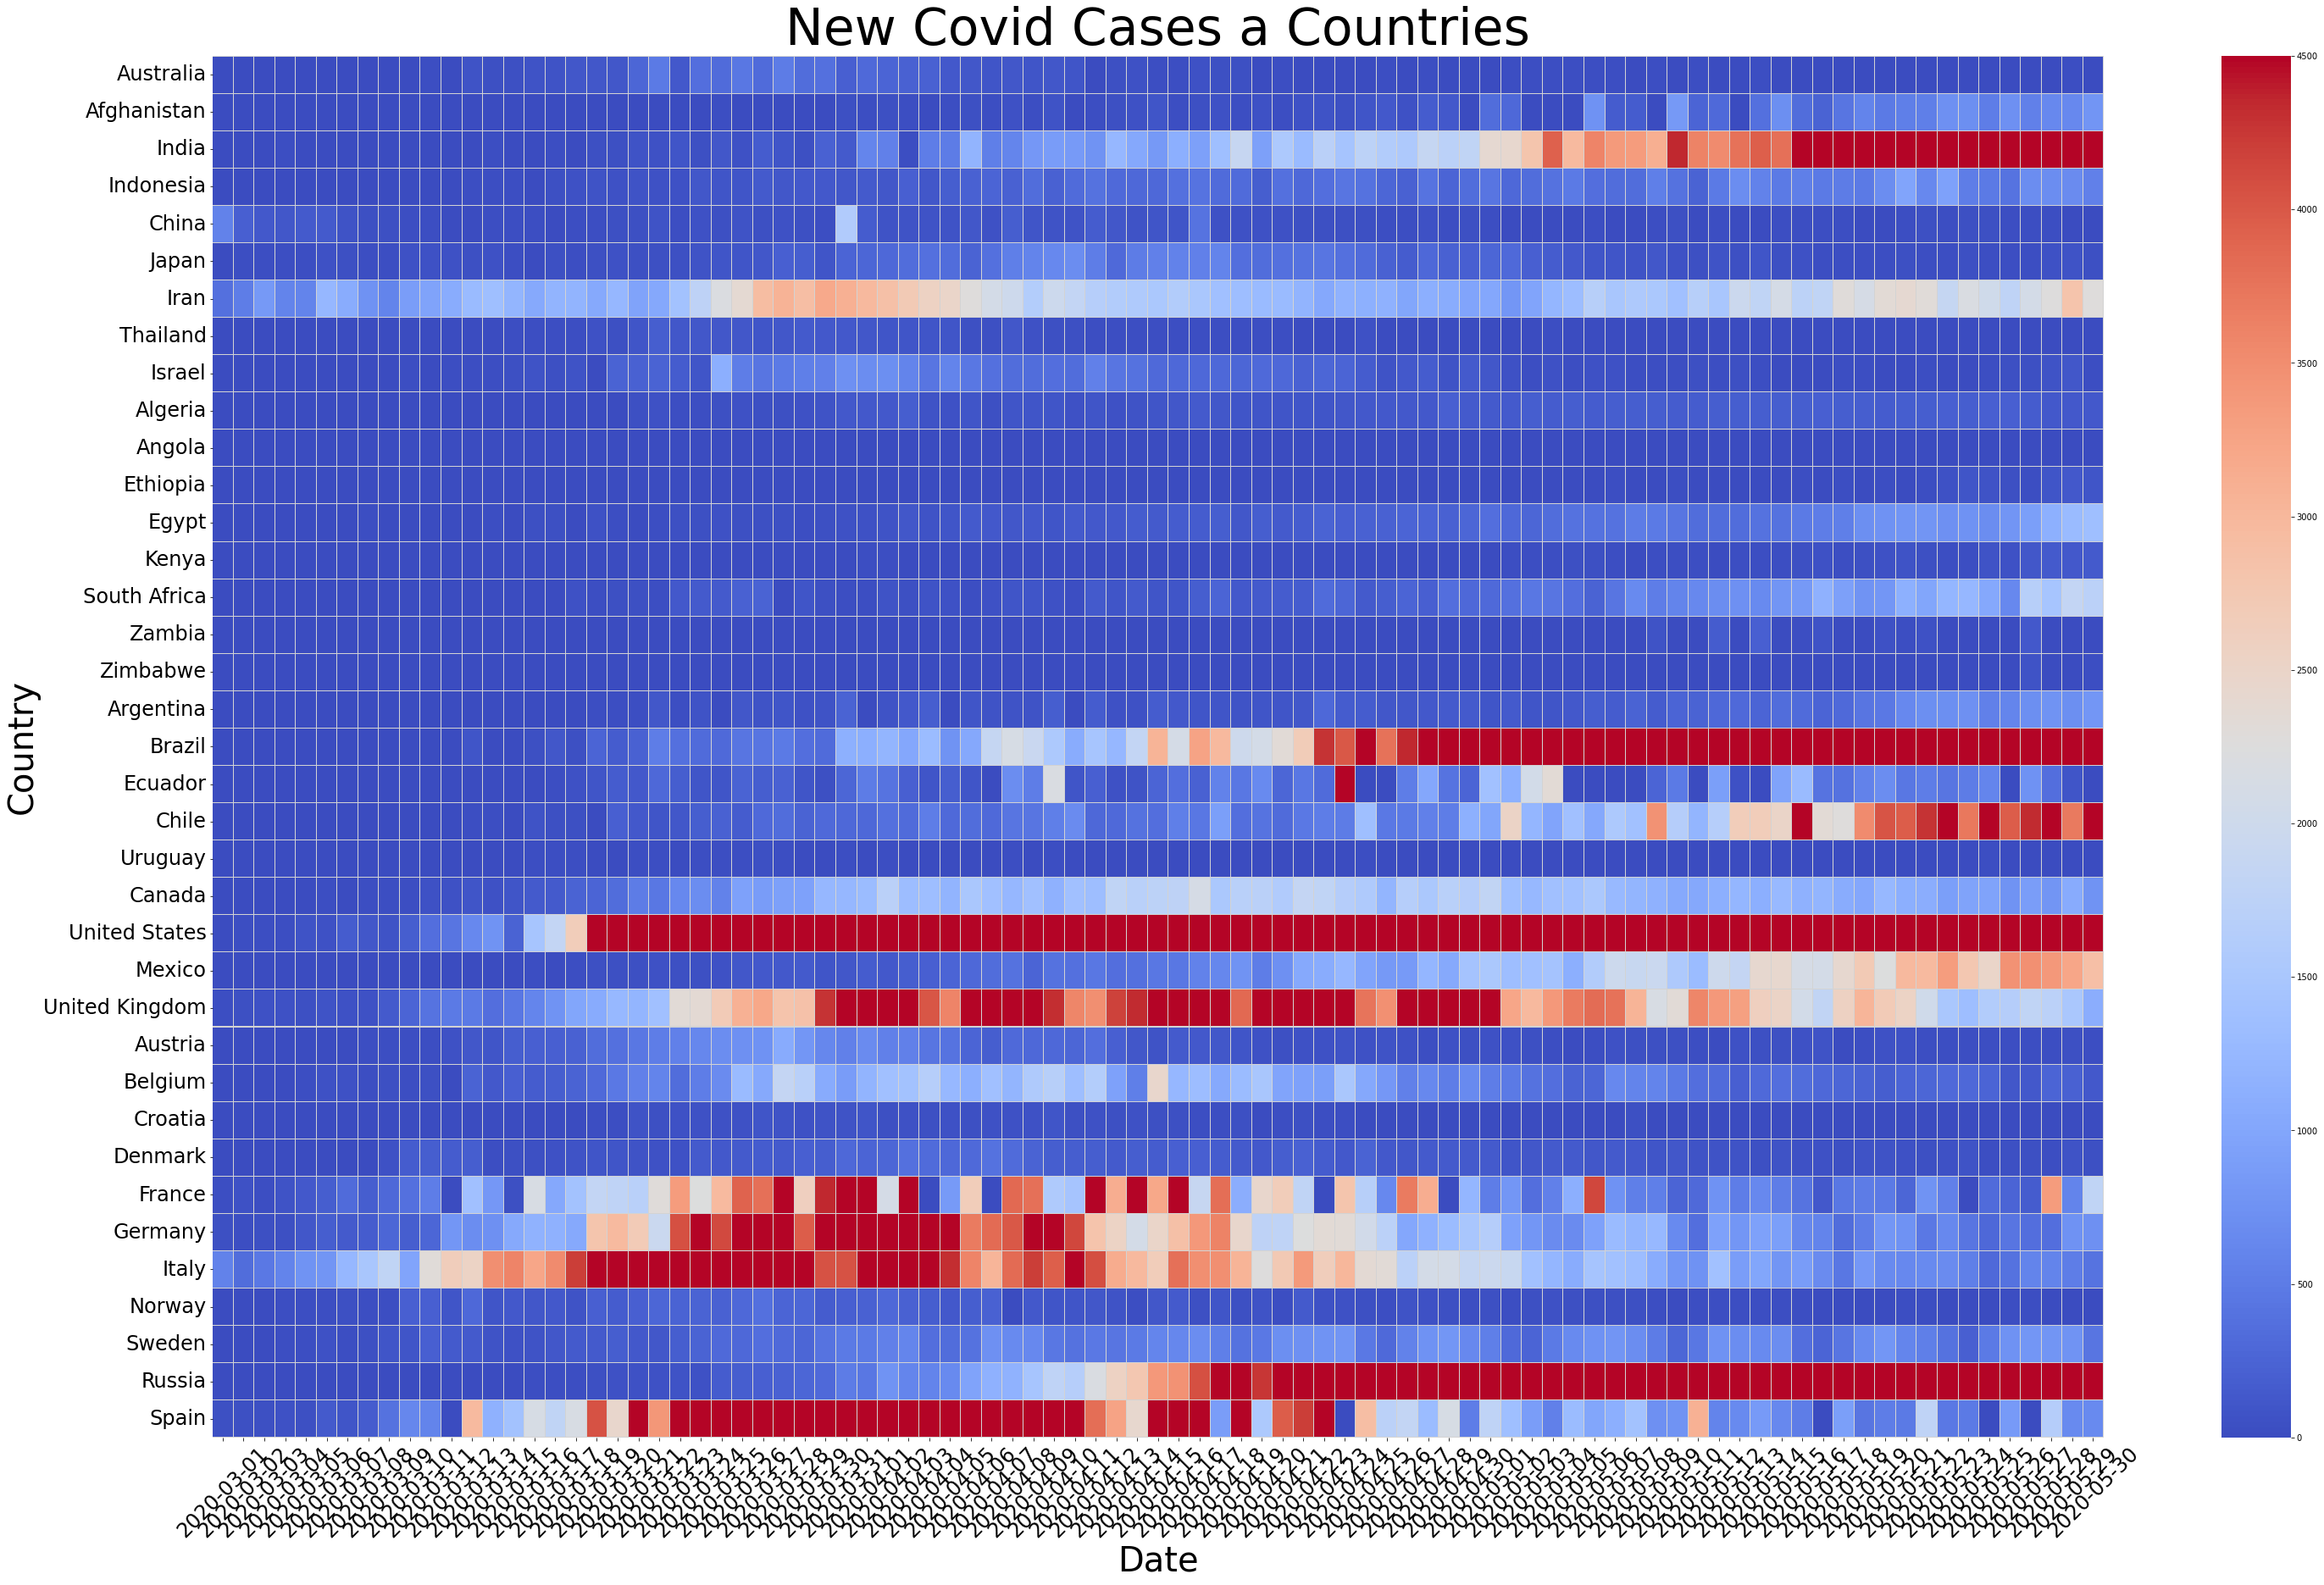

In [ ]:
plt.figure(figsize=(50, 30))
sns.heatmap(data_new2, cmap='coolwarm', robust=True, vmax=4500, fmt='.5g', linewidth=0.01, linecolor='lightgrey')
plt.xlabel('Date', fontsize=40)
plt.ylabel('Country', fontsize=40)
plt.title("New Covid Cases a Countries", fontsize=60)
plt.xticks(rotation = 45, fontsize=24)
plt.yticks(fontsize=24)
plt.savefig('Covid Heatmap.png')

## Violin plot

In [ ]:
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220338,ZWE,Africa,Zimbabwe,2022-09-26,257342.0,2.0,36.000,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220339,ZWE,Africa,Zimbabwe,2022-09-27,257376.0,34.0,31.429,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220340,ZWE,Africa,Zimbabwe,2022-09-28,257409.0,33.0,36.143,5602.0,3.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220341,ZWE,Africa,Zimbabwe,2022-09-29,257409.0,0.0,21.429,5602.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


### Canada_USA test dataframe

In [ ]:
covid["date"] = pd.to_datetime(covid["date"])
data  = covid.sort_values(by='date', axis=0)
covid_usa_can = data.query("location == 'United States' | location == 'Canada'")

In [ ]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
7526,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.00,76.67,0.845,NaN,NaN,NaN,NaN
127334,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
7527,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.00,76.67,0.845,NaN,NaN,NaN,NaN
127335,MEX,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
7528,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.00,76.67,0.845,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40516,CHL,South America,Chile,2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
75000,DEU,Europe,Germany,2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,...,28.2,33.1,NaN,8.00,81.33,0.947,NaN,NaN,NaN,NaN
51317,CZE,Europe,Czechia,2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,...,30.5,38.3,NaN,6.63,79.38,0.900,NaN,NaN,NaN,NaN
99082,ITA,Europe,Italy,2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN


Fist stage

In [ ]:
covid_usa_can = covid_usa_can.query("date >= '2020-03-01' & date < '2020-06-01'")

In [ ]:
covid_usa_can

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
207742,USA,North America,United States,2020-03-01,32.0,7.0,2.286,1.0,0.0,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,-13580.6,-2.48,0.10,-40.298800
34908,CAN,North America,Canada,2020-03-01,38.0,5.0,3.286,NaN,NaN,NaN,...,12.0,16.6,NaN,2.50,82.43,0.929,-2279.9,-4.07,-3.45,-59.753618
207743,USA,North America,United States,2020-03-02,55.0,23.0,5.571,6.0,5.0,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
34909,CAN,North America,Canada,2020-03-02,45.0,7.0,4.143,NaN,NaN,NaN,...,12.0,16.6,NaN,2.50,82.43,0.929,NaN,NaN,NaN,NaN
207744,USA,North America,United States,2020-03-03,74.0,19.0,8.286,7.0,1.0,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34997,CAN,North America,Canada,2020-05-29,90575.0,1069.0,904.571,7714.0,100.0,96.857,...,12.0,16.6,NaN,2.50,82.43,0.929,NaN,NaN,NaN,NaN
207832,USA,North America,United States,2020-05-30,1772189.0,22718.0,20771.857,107221.0,948.0,923.857,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
34998,CAN,North America,Canada,2020-05-30,91337.0,762.0,883.857,7772.0,58.0,91.857,...,12.0,16.6,NaN,2.50,82.43,0.929,NaN,NaN,NaN,NaN
207833,USA,North America,United States,2020-05-31,1790953.0,18764.0,20579.286,107844.0,623.0,921.571,...,19.1,24.6,NaN,2.77,78.86,0.926,123338.2,9.67,12.18,365.991304


### Graphs

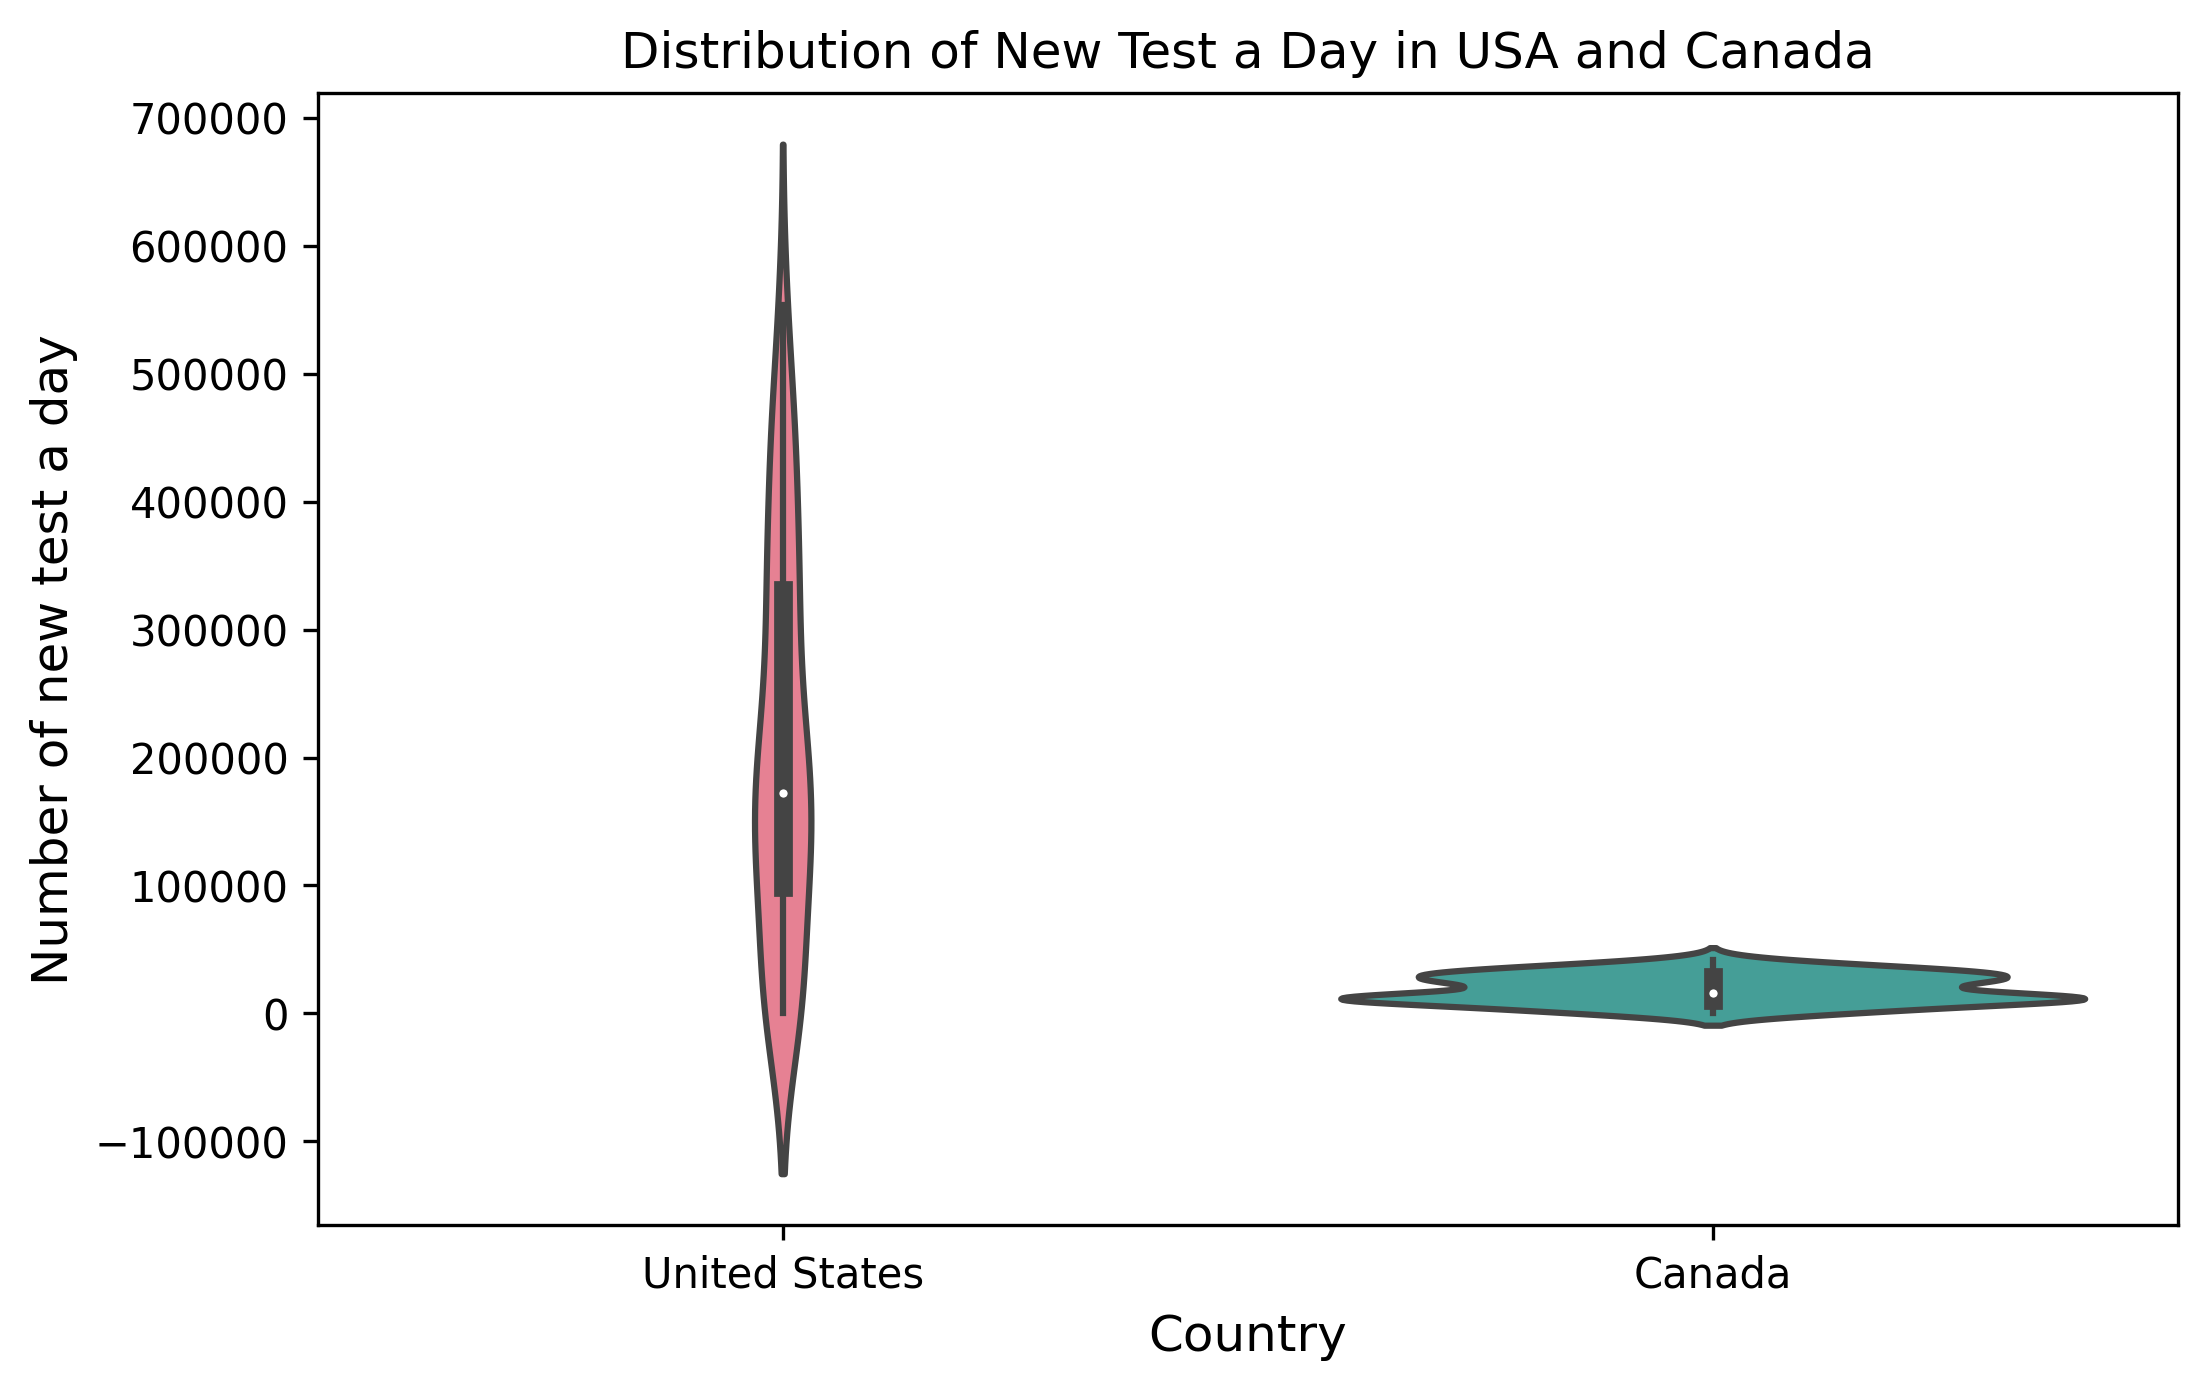

In [ ]:
plt.figure(figsize=(8, 5), dpi=300)
sns.violinplot(data=covid_usa_can, x="location", y="new_tests", width=0.8, palette='husl', saturation=0.75, dodge=False)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of new test a day', fontsize=12)
plt.title("Distribution of New Test a Day in USA and Canada", fontsize=12)
plt.savefig('New_test_violinplot.png')

## Correlation

In [ ]:
covid_usa = covid_usa_can.query("location == 'United States'")
covid_can = covid_usa_can.query("location == 'Canada'")

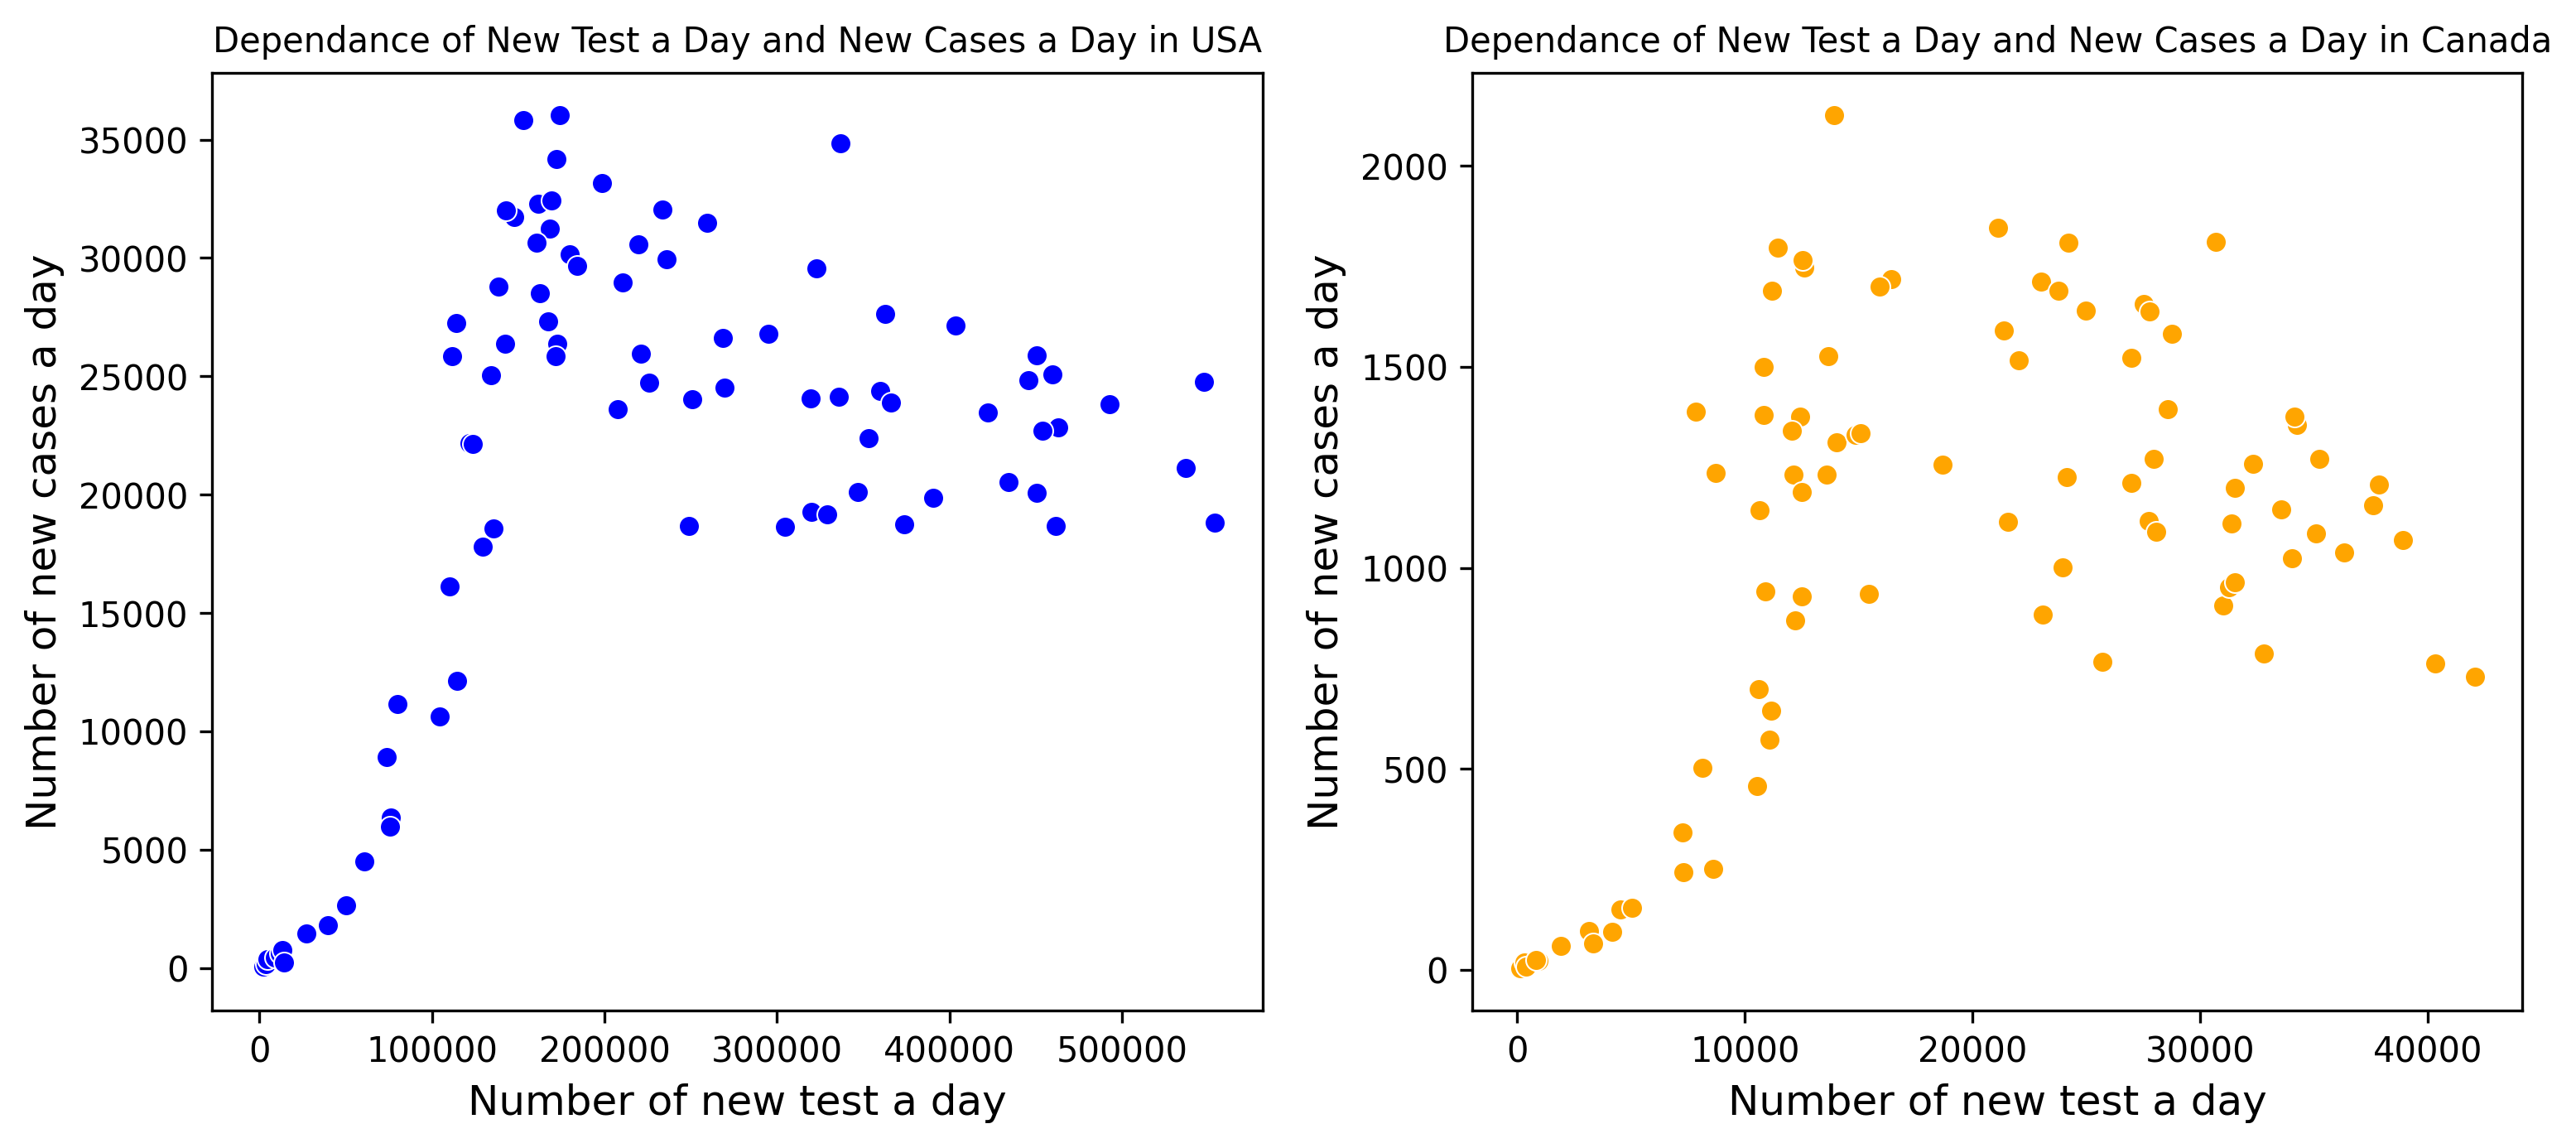

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), dpi=300)
ax=axes[0]
sns.scatterplot(data=covid_usa, x='new_tests', y='new_cases', color='blue', ax=axes[0])
ax.set_xlabel('Number of new test a day', fontsize=12)
ax.set_ylabel('Number of new cases a day', fontsize=12)
ax.set_title("Dependance of New Test a Day and New Cases a Day in USA", fontsize=10)
ax=axes[1]
sns.scatterplot(data=covid_can, x='new_tests', y='new_cases', color='orange', ax=axes[1])
ax.set_xlabel('Number of new test a day', fontsize=12)
ax.set_ylabel('Number of new cases a day', fontsize=12)
ax.set_title("Dependance of New Test a Day and New Cases a Day in Canada", fontsize=10)
plt.savefig('Dependances.png')